<u><b>Desafio n° 1:</b></u>
<b>Analisis Exploratorio de Dataset de precios de propiedades</b>

<b>Grupo 4</b>

<b>Integrantes</b>
<ul>
<li>Angeli, Francesco</li>
<li>Brandan, Gabriel</li>
<li>Cubric, Walter</li>
<li>Giusti, Patricio Daniel</li>
<li>Morelli, Francisco</li>
<li>Sanchez, Hernán</li>
</ul>
<b>Imports</b>

In [1]:
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re
#importamos Plotly
import plotly.express as px
#importamos Seaborn
import seaborn as sns

In [2]:
#importacion base de datos#
df = pd.read_csv("Data/properati.csv", sep=",")

#print tipo de datos
print(df.dtypes)

#ejemplo primeros tres
df.head(3)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [4]:
#revisamos los campos nulos en el dataframe
cant_nulos_por_campo = df.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo)

#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos
cant_registros = df.shape[0]
print(cant_registros)


Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64
121220


In [5]:
#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos en %

porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print(porc_nulos_por_campo)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [148]:
df["state_name"].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [63]:
pais = df
#generamos una nueva columna para realizar el conteo
pais['counter'] = 1
#generamos una lista acotada de columnas, para centrarnos solo en las variables de estas
pais[['state_name','price_per_m2','price_usd_per_m2']]
#agrupamos las provincias por provincia ycantidad de casos, totalizando la cantidad total por la columna counter 
pais_group1 = pais.groupby(by=['state_name'],as_index=False)['counter'].sum()
pais_group1

,state_name,counter
0,Bs.As. G.B.A. Zona Norte,25560
1,Bs.As. G.B.A. Zona Oeste,9322
2,Bs.As. G.B.A. Zona Sur,13952
3,Buenos Aires Costa Atlántica,10006
4,Buenos Aires Interior,2291
5,Capital Federal,32316
6,Catamarca,27
7,Chaco,57
8,Chubut,259
9,Corrientes,583


# Tratamiento por provincia
Decidimos dividir el pais en dos grandes grupos

# 1. Interior
<ul>
<li>Entre Ríos</li>
<li>Santa Fe </li>
<li>Córdoba</li>
<li>Misiones</li>
<li>Salta</li>
<li>Neuquén</li>
<li>Río Negro</li>
<li>San Luis</li>
<li>Mendoza</li>
<li>Corrientes</li>
<li>Chubut</li>
<li>Tucumán</li>
<li>La Pampa</li>
<li>Chaco</li>
<li>San Juan</li>
<li>Santa Cruz</li>
<li>Tierra Del Fuego</li>
<li>Catamarca</li>
<li>Santiago Del Estero</li>
<li>Jujuy</li>
<li>La Rioja</li>
<li>Formosa</li>
</ul>


In [6]:
#aplicamos un Query en StateName de los que no son Buenos Aires y CABA
provincias = df.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')

In [29]:
#tamaño de la máscara
provincias.shape

(27773, 28)

In [30]:
#imprimimos sus columnas
provincias.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'nulos', 'counter'],
      dtype='object')

In [31]:
## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      
len(provincias) - len(provincias['price_usd_per_m2'].dropna()) 

18152

In [32]:
#generamos una nueva columna y traemos los nulos
provincias['nulos'] = pd.isnull(provincias['price_usd_per_m2'])


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
#generamos una nueva columna con un para realizar un conteo
provincias['counter'] = 1
#generamos una lista acotada de columnas, para centrarnos solo en las variables de estas
provincias[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state_name,price_per_m2,price_usd_per_m2,nulos
5,Entre Ríos,NaN,NaN,True
9,Santa Fe,NaN,NaN,True
10,Córdoba,NaN,46.235139,False
20,Córdoba,NaN,NaN,True
32,Córdoba,11000.0,616.920400,False
...,...,...,...,...
121202,Córdoba,NaN,1625.348077,False
121203,Córdoba,NaN,1684.753600,False
121204,Córdoba,NaN,1684.753600,False
121205,Córdoba,NaN,1690.362000,False


In [59]:
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
provincias_group1 = provincias.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()


In [35]:
#transformamos a string la columna nulos
provincias_group1['nulos'] = provincias_group1['nulos'].astype(str)

In [36]:
#reemplazamos False por "hay datos "y True por "no hay datos"
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('False','Hay datos')
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('True','No hay datos')

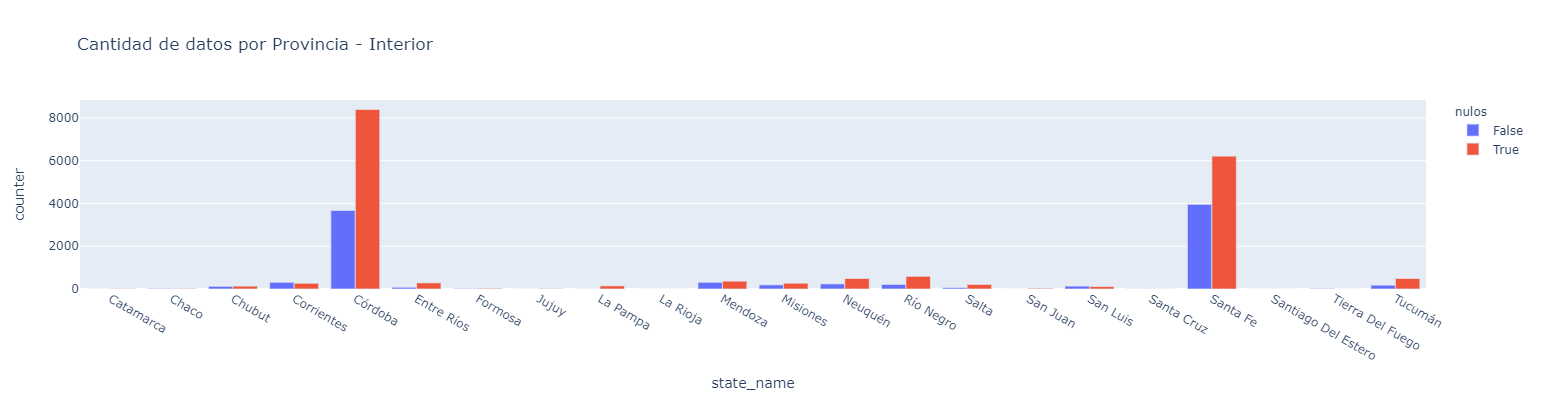

In [69]:
#graficamos los datos faltantes y completos por provincia
fig = px.bar(provincias_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title= "Cantidad de datos por Provincia - Interior")
fig.show()

## Definición sobre variable preponderante
Creemos que la variable mas preponderante en el analisis propuesto por la compañia es el de Precio por metro cuadrado y habiendo dos columnas, una en pesos y otra en dolares, hemos decidido revisar la que está en dolares ya que dicha moneda es mas homogea y se ve afectada en menor medida por el paso del tiempo y la inflación, haciendo comparables los diversos valores. 


In [38]:
#agrupamos nuevamente por provincia trayendo la variable 'price_usd_per_m2' y las variables agregadas de mínimo y máximo
provincias_group2 = provincias.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [39]:
#reseteamos el index
provincias_group2.reset_index(inplace=True)

In [40]:
#generamos una nueva columna, la de rango que es la diferencia entre el precio maximmo y minimo
provincias_group2['rango'] = provincias_group2['max'] - provincias_group2['min']

In [41]:
provincias_group2

,state_name,min,max,rango
0,Catamarca,145.454545,1666.666667,1521.212121
1,Chaco,163.033942,2386.363636,2223.329695
2,Chubut,13.500000,14540.550661,14527.050661
3,Corrientes,83.682008,3500.000000,3416.317992
4,Córdoba,1.184571,30000.000000,29998.815429
5,Entre Ríos,5.608367,24038.461538,24032.853171
6,Formosa,1490.540000,1514.259219,23.719219
7,Jujuy,210.313787,1682.510200,1472.196412
8,La Pampa,392.585700,1402.091875,1009.506175
9,La Rioja,243.029233,243.029233,0.000000


# 2. Buenos Aires y CABA

<ul>
<li>Capital Federal</li>
<li>Bs.As. G.B.A. Zona Sur</li>
<li>Buenos Aires Costa Atlántica</li>
<li>Bs.As. G.B.A. Zona Norte</li>
<li>Bs.As. G.B.A. Zona Oeste</li> 
<li>Buenos Aires Interior</li>
</ul>


In [93]:
#generamos un query por el positivo por todas las jurisdicciones mensionadas y luego una por cada una, para poder analizarlas 
baires = df.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
caba = df.query(' state_name == "Capital Federal"')
bsas_sur = df.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
bsas_costa = df.query(' state_name == "Buenos Aires Costa Atlántica"')
bsas_norte = df.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
bsas_oeste = df.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
bsas_interior = df.query(' state_name == "Buenos Aires Interior"')


In [94]:
#tamaño de la máscara
baires.shape

(93447, 27)

In [95]:
## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      
len(baires) - len(baires['price_usd_per_m2'].dropna()) 

34451

In [96]:
##generamos una nueva columnam en cada una de las querys y traemos los nulos de la columna de precios en dolares por metro cuadrado

baires['nulos'] = pd.isnull(baires['price_usd_per_m2'])
caba['nulos'] = pd.isnull(caba['price_usd_per_m2'])
bsas_sur['nulos'] = pd.isnull(bsas_sur['price_usd_per_m2'])
bsas_norte['nulos'] = pd.isnull(bsas_norte['price_usd_per_m2'])
bsas_costa['nulos'] = pd.isnull(bsas_costa['price_usd_per_m2'])
bsas_oeste['nulos'] = pd.isnull(bsas_oeste['price_usd_per_m2'])
bsas_interior['nulos'] = pd.isnull(bsas_interior['price_usd_per_m2'])



C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [97]:
baires.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,counter,nulos
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,False
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,True
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,False


In [98]:
#generamos una columna con el valor 1 en cada query
baires['counter'] = 1
caba['counter'] = 1
bsas_costa['counter'] = 1
bsas_norte['counter'] = 1
bsas_oeste['counter'] = 1
bsas_sur['counter'] = 1
bsas_interior['counter'] = 1

#generamos vista abreviada de las columnas provincia, precio x metro cuadrado, precio por metro cuadrado en dolares y la columna nulos
baires[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,state_name,price_per_m2,price_usd_per_m2,nulos
0,Capital Federal,1550.000000,1127.272727,False
1,Bs.As. G.B.A. Zona Sur,NaN,NaN,True
2,Capital Federal,1309.090909,1309.090909,False
3,Capital Federal,NaN,NaN,True
4,Buenos Aires Costa Atlántica,1828.571429,1828.571429,False
...,...,...,...,...
121215,Capital Federal,9354.838710,7699.115044,False
121216,Bs.As. G.B.A. Zona Norte,1383.333333,1383.333333,False
121217,Capital Federal,3371.794872,2858.695652,False
121218,Buenos Aires Costa Atlántica,1997.916667,1997.916667,False


In [99]:
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
baires_group1 = baires.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()

In [100]:
#transformamos la columna nulo en string
baires_group1['nulos'] = baires_group1['nulos'].astype(str)

In [101]:
#reemplazamos False por "hay datos "y True por "no hay datos"
baires_group1['nulos'] = baires_group1.nulos.str.replace('False','Hay datos')
baires_group1['nulos'] = baires_group1.nulos.str.replace('True','No hay datos')

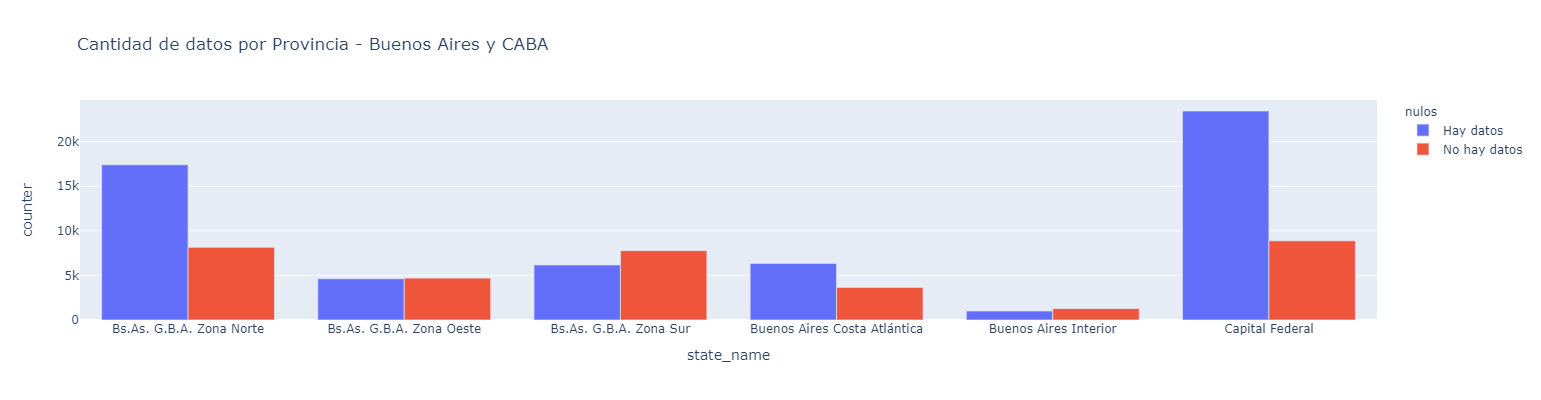

In [102]:
#imprimimos gráfico
fig = px.bar(baires_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title = "Cantidad de datos por Provincia - Buenos Aires y CABA")
fig.show()



In [103]:
#agrupamos nuevamente por provincia trayendo la variable 'price_usd_per_m2' y las variables agregadas de mínimo y máximo
baires_group2 = baires.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [104]:
#reseteamos el index
baires_group2.reset_index(inplace=True)

In [105]:
#creamos la columna rango
baires_group2['rango'] = baires_group2['max'] - baires_group2['min']

In [106]:
baires_group2

,state_name,min,max,rango
0,Bs.As. G.B.A. Zona Norte,4.166667,48296.222222,48292.055556
1,Bs.As. G.B.A. Zona Oeste,7.000000,80000.000000,79993.000000
2,Bs.As. G.B.A. Zona Sur,19.314341,23140.764706,23121.450365
3,Buenos Aires Costa Atlántica,1.000000,21897.058824,21896.058824
4,Buenos Aires Interior,2.072029,4166.666667,4164.594638
5,Capital Federal,13.797467,206333.333333,206319.535867


In [107]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
caba_barrios_grupo = caba.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
caba_barrios_grupo['nulos'] = caba_barrios_grupo['nulos'].astype(str)
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('False','Hay datos')
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('True','No hay datos')

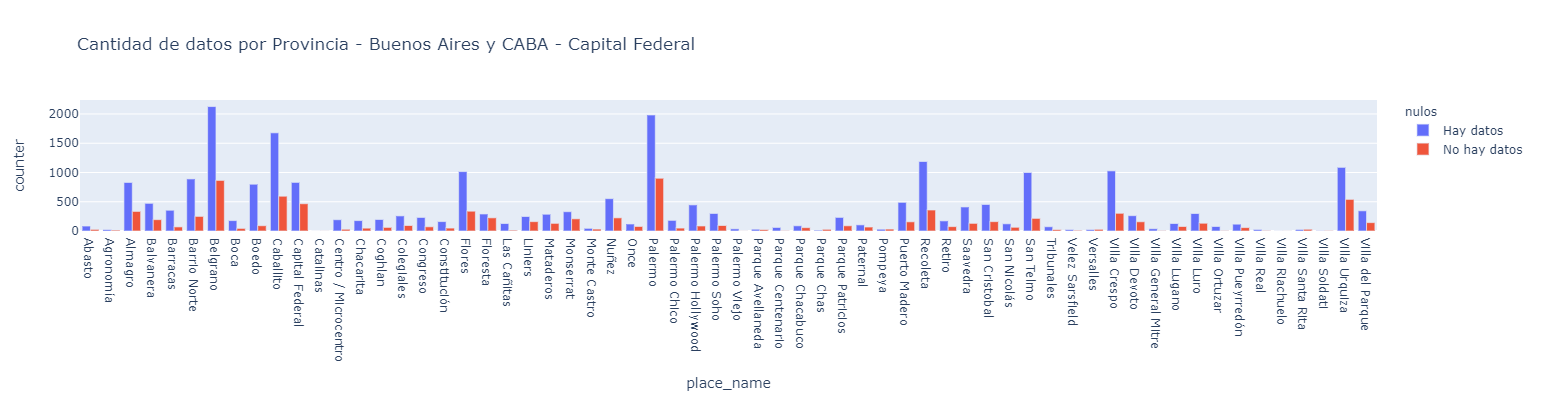

In [108]:
fig = px.bar(caba_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Capital Federal")
fig.show()



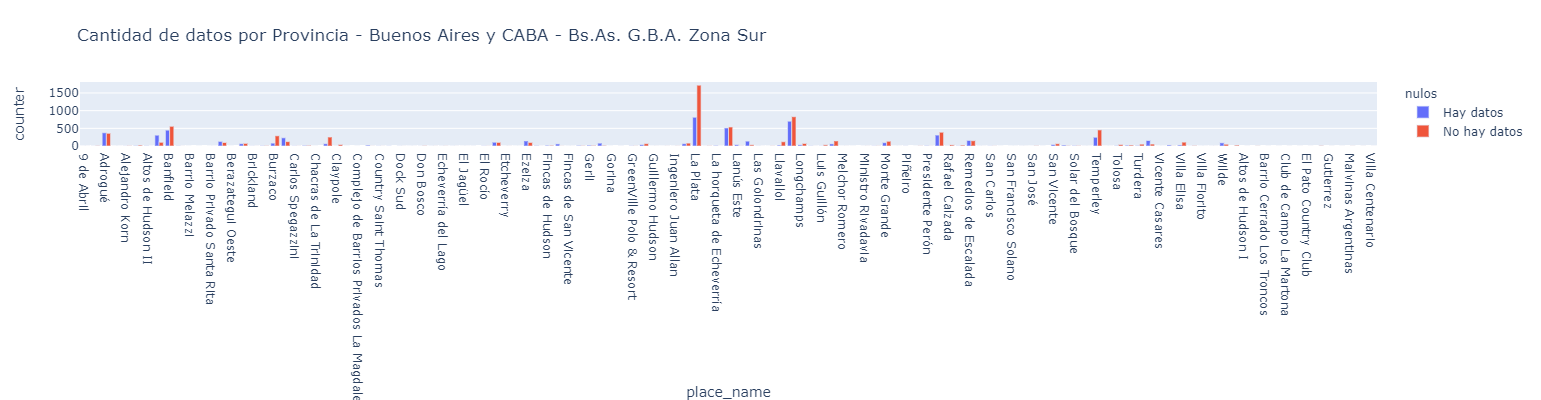

In [109]:
bsas_sur_barrios_group = bsas_sur.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group['nulos'].astype(str)
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('False','Hay datos')
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_sur_barrios_group, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA - Bs.As. G.B.A. Zona Sur")
fig.show()



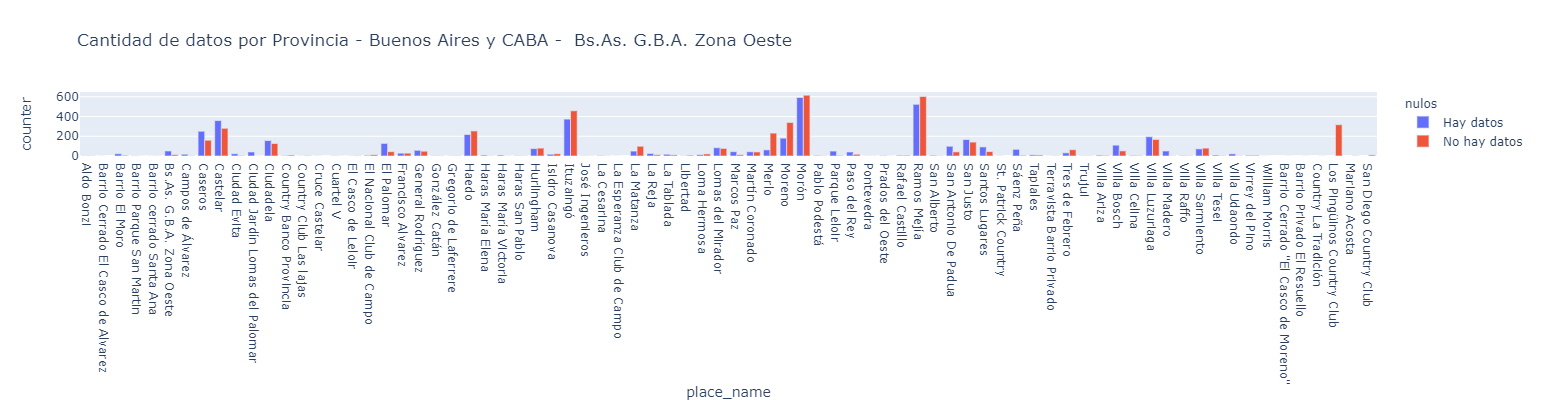

In [110]:
bsas_oeste_barrios_grupo = bsas_oeste.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo['nulos'].astype(str)
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_oeste_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA -  Bs.As. G.B.A. Zona Oeste")
fig.show()



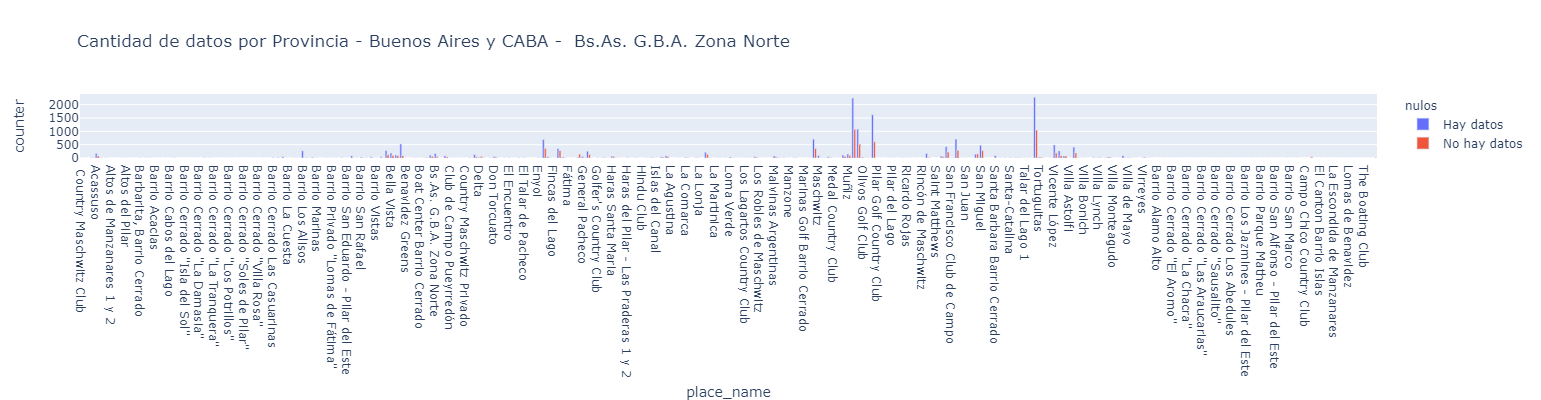

In [112]:
bsas_norte_barrios_grupo = bsas_norte.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo['nulos'].astype(str)
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_norte_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA -  Bs.As. G.B.A. Zona Norte")
fig.show()

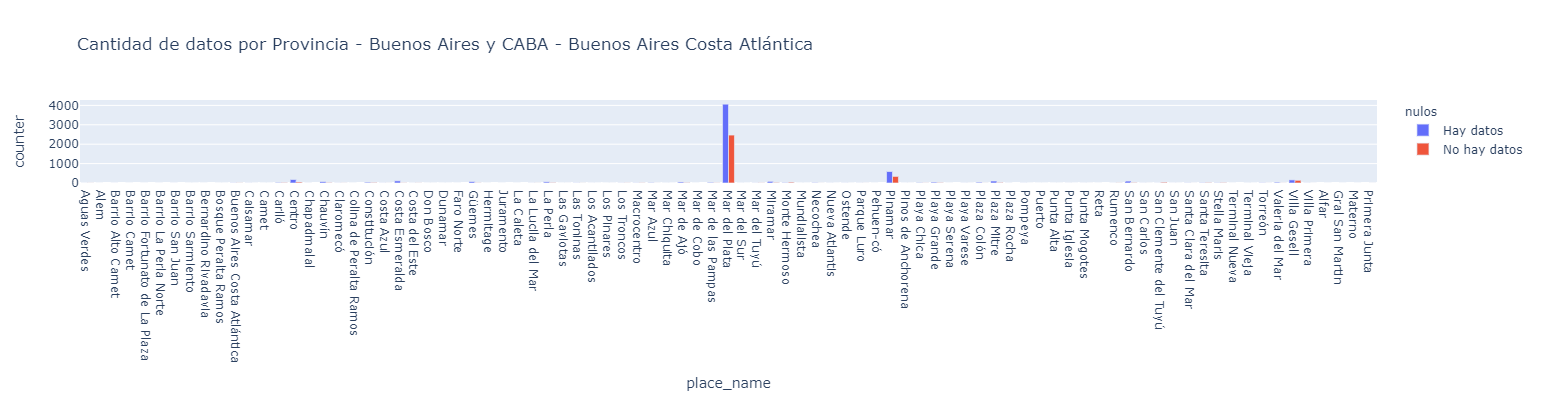

In [113]:
bsas_costa_barrios_grupo = bsas_costa.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo['nulos'].astype(str)
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_costa_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Costa Atlántica")
fig.show()

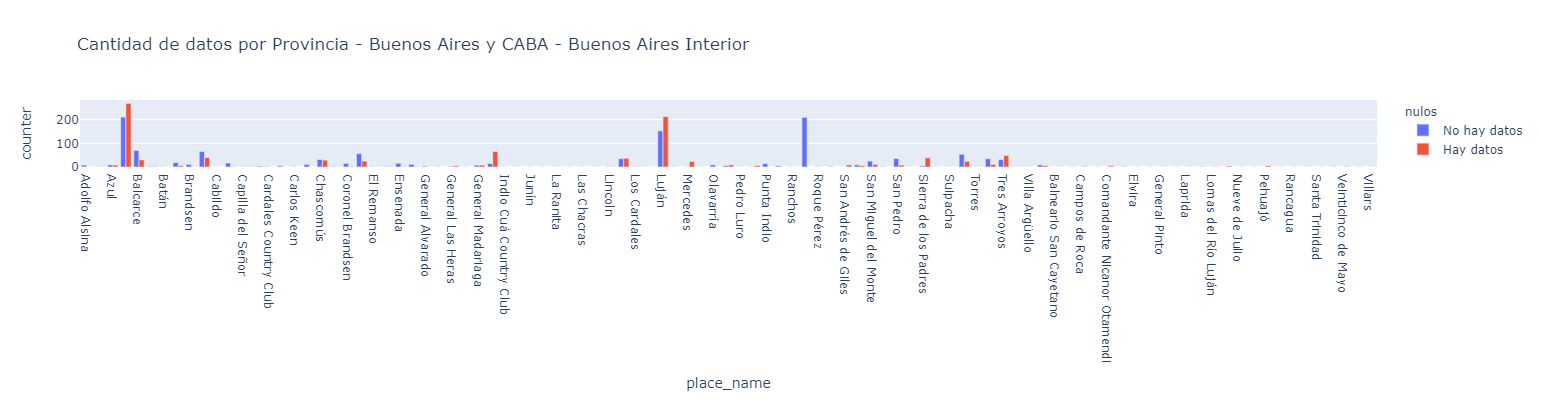

In [114]:
bsas_interior_barrios_grupo = bsas_interior.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo['nulos'].astype(str)
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_interior_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Interior")
fig.show()

 # Detección
Habiendo definido que la variable mas preponderante para el analisis es la de precio por metro cuadrado en dólares y que la pérdida de datos en dicha columna asciende al 43% intentaremos disminuir el porcentaje de datos perdidos recalculando este dato por medio de la relacion establecida con las columnas price_aprox_usd (%  16.83 datos perdidos), surface_total_in_m2 (datos perdidos % 32.44) y para cuando esta no este disponible, la rellenaremos con surface_covered_in_m2 (datos perdidos % 16.42).




In [188]:
#Desidir si debemos dropear o estimar con algun indicador estadistico los valores faltantes
#Seleccion de variables que consideramos importantes para la regresión
#Limpiar esas variables. 
#Ver si agregamos los boxplot por cada muestra o grupo, grafico comparativo de datos iniciales y datos analizados

print(caba['price_usd_per_m2'].describe())
print(bsas_sur['price_usd_per_m2'].describe())
print(bsas_costa['price_usd_per_m2'].describe())
print(bsas_norte['price_usd_per_m2'].describe())
print(bsas_oeste['price_usd_per_m2'].describe())
print(bsas_interior['price_usd_per_m2'].describe())


count     23434.000000
mean       3116.930444
std        3681.030087
min          13.797467
25%        1966.062830
50%        2468.750000
75%        3076.923077
max      206333.333333
Name: price_usd_per_m2, dtype: float64
count     6173.000000
mean      1525.356899
std       1119.507894
min         19.314341
25%        996.015936
50%       1492.063492
75%       1939.393939
max      23140.764706
Name: price_usd_per_m2, dtype: float64
count     6350.000000
mean      1574.633123
std        916.209264
min          1.000000
25%       1000.000000
50%       1617.647059
75%       2051.282051
max      21897.058824
Name: price_usd_per_m2, dtype: float64
count    17405.000000
mean      1860.779924
std       1894.265775
min          4.166667
25%       1122.778675
50%       1666.666667
75%       2329.411765
max      48296.222222
Name: price_usd_per_m2, dtype: float64
count     4623.000000
mean      1349.904779
std       1636.372787
min          7.000000
25%        733.514493
50%       1260.000000
